<a href="https://colab.research.google.com/github/sense64/data_viz/blob/main/senior_digital_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#한글이 깨어져 나오는 경우

한글이 깨어져 나오는 것은 한글 폰트가 설치되어 있지 않기 때문에 아래와 같이 한글 폰트를 설치합니다. 그리고 설치된 폰트를 사용하기 위해 [런타임] 메뉴-> 런타임 다시 시작을 하시면 됩니다.

In [1]:
#한글이 깨어지는 경우

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,496 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and dire

# 주요 패키지 4개 임포트

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
#한글 폰트를 설치
plt.rc('font', family='NanumBarunGothic')
df = pd.read_excel("/content/drive/MyDrive/old_wellbing/sinor_data.xlsx")
df.head()

,no,Q5A1,Q5A2,Q5A3,Q5A4,Q5A5,Q5A6,Q5A7,Q5,Q8B1,...,Q13,Q14B1,Q14B2,Q14B3,Q14B4,Q14,age,gender,wage,wt_가중치
0,1,2,2,2,3,3,3,3,2.571429,4,...,1.00,2,1,1,1,1.25,2,1,6,0.276925
1,2,2,3,1,3,1,1,1,1.714286,4,...,1.00,1,1,1,3,1.50,1,2,3,2.019244
2,3,3,3,1,4,3,1,1,2.285714,4,...,3.00,3,3,3,3,3.00,1,2,4,0.671010
3,4,2,2,1,2,1,2,1,1.571429,4,...,2.25,2,2,3,2,2.25,2,2,4,1.910782
4,5,3,3,2,3,2,2,2,2.428571,3,...,1.50,1,1,1,1,1.00,2,1,3,0.775390


In [36]:
#데이터를 범주형과 계량형으로 나누어 데이터 셑을 지정
df_num=df[['Q5','Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']]
df_cat=df[['age', 'gender', 'wage']]
print(df_num.head(), df_cat.head())

         Q5    Q8   Q9   Q10  Q11  Q12   Q13   Q14
0  2.571429  2.25  1.6  1.75  2.0  2.5  1.00  1.25
1  1.714286  2.25  1.6  2.50  1.0  2.0  1.00  1.50
2  2.285714  2.25  1.6  2.50  2.5  3.0  3.00  3.00
3  1.571429  2.75  3.0  3.00  3.5  3.5  2.25  2.25
4  2.428571  1.75  1.4  2.50  1.0  2.5  1.50  1.00    age  gender  wage
0    2       1     6
1    1       2     3
2    1       2     4
3    2       2     4
4    2       1     3


In [37]:
#반복문을 이용하여 모든 범주형 데이터의 빈도분석을 한꺼번에 처리
for col in df_cat.columns :
  print(col)
  print(df[col].value_counts())
  print(df[col].value_counts(normalize=True)*100)
  print("=================================")

age
2    849
1    496
3    463
Name: age, dtype: int64
2    46.957965
1    27.433628
3    25.608407
Name: age, dtype: float64
gender
1    908
2    900
Name: gender, dtype: int64
1    50.221239
2    49.778761
Name: gender, dtype: float64
wage
3     383
4     359
2     346
5     196
6     195
7     129
1     104
8      52
9      33
11     10
10      1
Name: wage, dtype: int64
3     21.183628
4     19.856195
2     19.137168
5     10.840708
6     10.785398
7      7.134956
1      5.752212
8      2.876106
9      1.825221
11     0.553097
10     0.055310
Name: wage, dtype: float64


In [38]:
w=[]
for data in df['wage']:
  if data==1 or data==2 or data==3 or data==4 :
    w.append(data)
  elif data==5 or data==6 :
    w.append(5)
  else :
    w.append(6)

df['w'] =pd.DataFrame(w)
df_cat['w'] =pd.DataFrame(w)


<ipython-input-38-cb106c490923>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['w'] =pd.DataFrame(w)


In [39]:
df_cat= df_cat.replace({'gender' : 1}, "남자")
df_cat = df_cat.replace({'gender' : 2}, "여자")
df_cat = df_cat.replace({'age' : 1}, "50대")
df_cat = df_cat.replace({'age' : 2}, "60대")
df_cat = df_cat.replace({'age' : 3}, "70대이상")
df_cat = df_cat.replace({'w' : 1}, "100만원미만")
df_cat = df_cat.replace({'w' : 2}, "100만원대")
df_cat = df_cat.replace({'w' : 3}, "200만원대")
df_cat = df_cat.replace({'w' : 4}, "300만원대")
df_cat = df_cat.replace({'w' : 5}, "400-500만원대")
df_cat = df_cat.replace({'w' : 6}, "600만원이상")
df_cat.head()

,age,gender,wage,w
0,60대,남자,6,400-500만원대
1,50대,여자,3,200만원대
2,50대,여자,4,300만원대
3,60대,여자,4,300만원대
4,60대,남자,3,200만원대


In [40]:
data = pd.concat([df_num, df_cat], axis=1, join='inner')
print(data)

            Q5    Q8   Q9   Q10  Q11  Q12   Q13   Q14  age gender  wage  \
0     2.571429  2.25  1.6  1.75  2.0  2.5  1.00  1.25  60대     남자     6   
1     1.714286  2.25  1.6  2.50  1.0  2.0  1.00  1.50  50대     여자     3   
2     2.285714  2.25  1.6  2.50  2.5  3.0  3.00  3.00  50대     여자     4   
3     1.571429  2.75  3.0  3.00  3.5  3.5  2.25  2.25  60대     여자     4   
4     2.428571  1.75  1.4  2.50  1.0  2.5  1.50  1.00  60대     남자     3   
...        ...   ...  ...   ...  ...  ...   ...   ...  ...    ...   ...   
1803  4.000000  3.00  3.4  3.00  4.0  3.0  3.50  3.50  50대     남자     5   
1804  4.000000  2.50  2.6  3.25  3.0  3.5  3.00  3.50  50대     남자     4   
1805  4.000000  2.75  1.6  2.25  3.0  3.0  3.00  3.00  50대     남자     7   
1806  4.000000  3.50  3.2  3.50  4.0  3.0  2.50  2.25  50대     남자     4   
1807  4.000000  2.50  2.0  2.00  2.0  1.0  1.00  1.00  60대     남자     4   

               w  
0     400-500만원대  
1         200만원대  
2         300만원대  
3         300만원대  
4   

<Axes: >

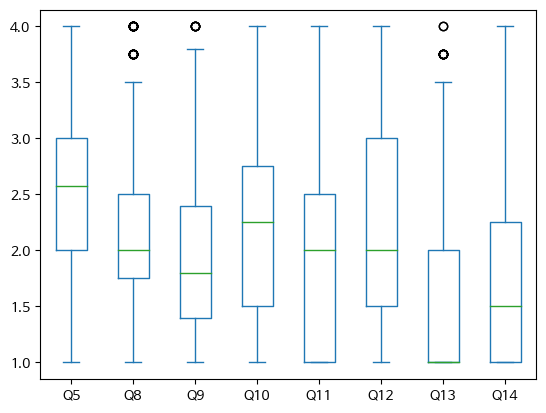

In [41]:
#데이터 시각화
df_num.plot(kind='box')


Text(0.5, 1.0, '디지털정보역량 상자그림')

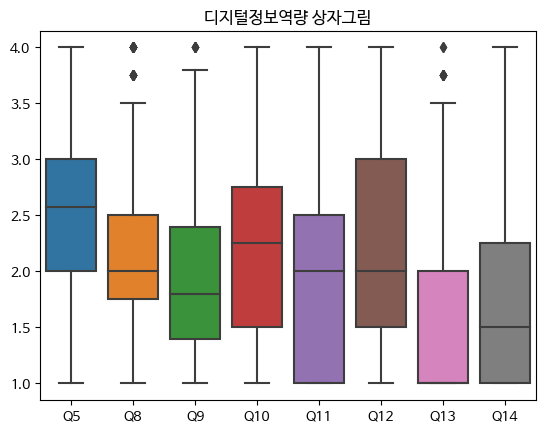

In [42]:
sns.boxplot(df_num)
plt.title("디지털정보역량 상자그림")

<Axes: ylabel='Density'>

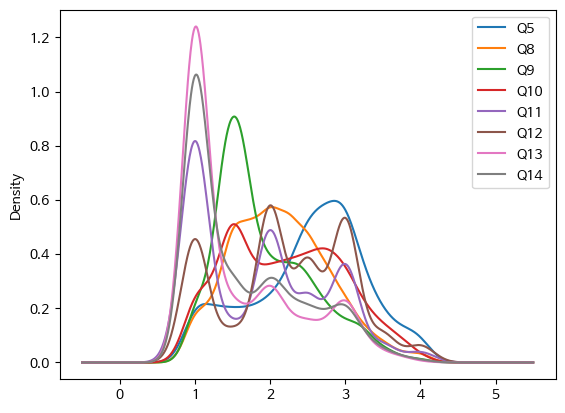

In [43]:
df_num.plot(kind='kde')

<Axes: >

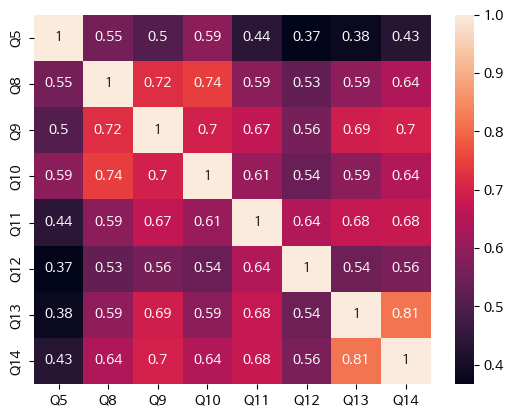

In [44]:
#heatmap
plt.rc('font', family='NanumBarunGothic')
df_num_corr = df_num.corr()
sns.heatmap(df_num_corr,annot = True)

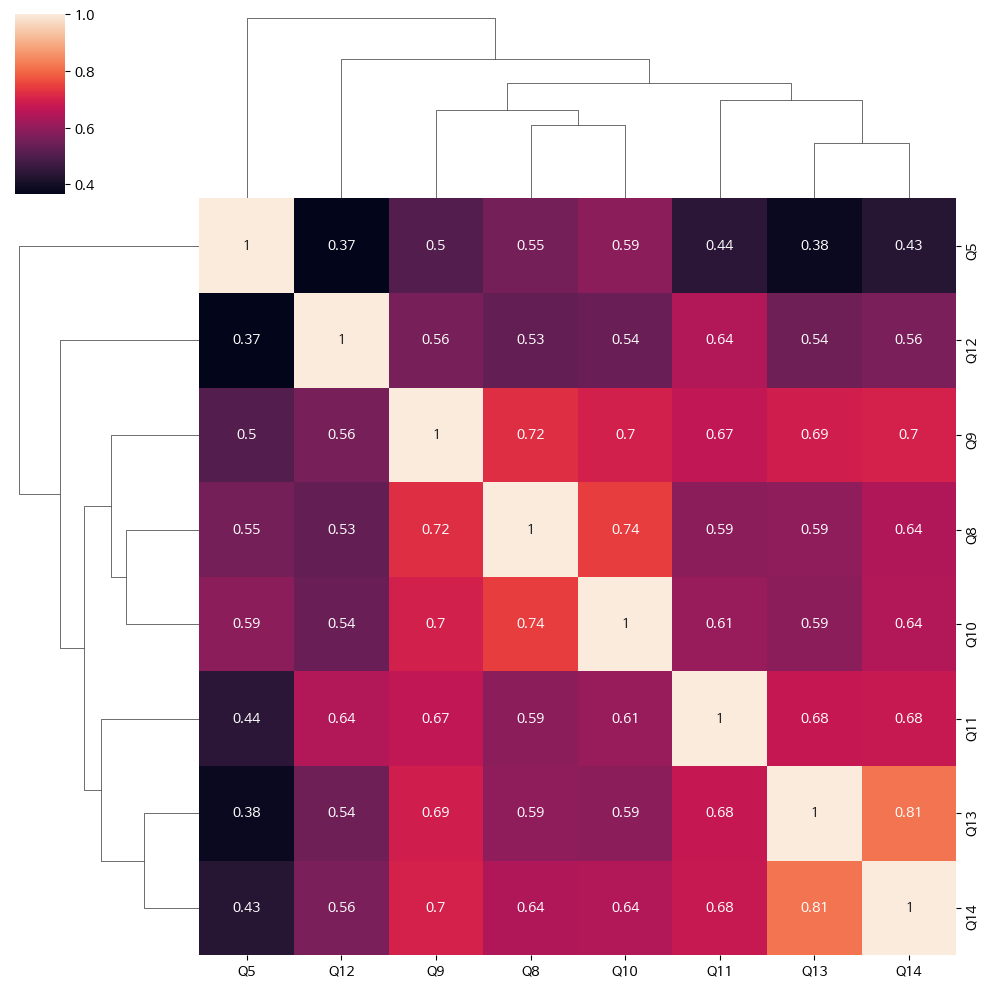

In [45]:
df_num_corr = df_num.corr()

sns.clustermap(df_num_corr , annot = True )

<Axes: xlabel='Q13', ylabel='Q14'>

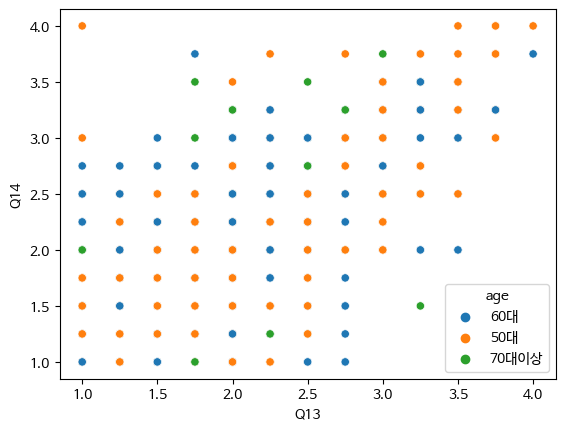

In [46]:
#seaborn으로 시각화
sns.scatterplot(x='Q13', y='Q14', data=data, hue="age")

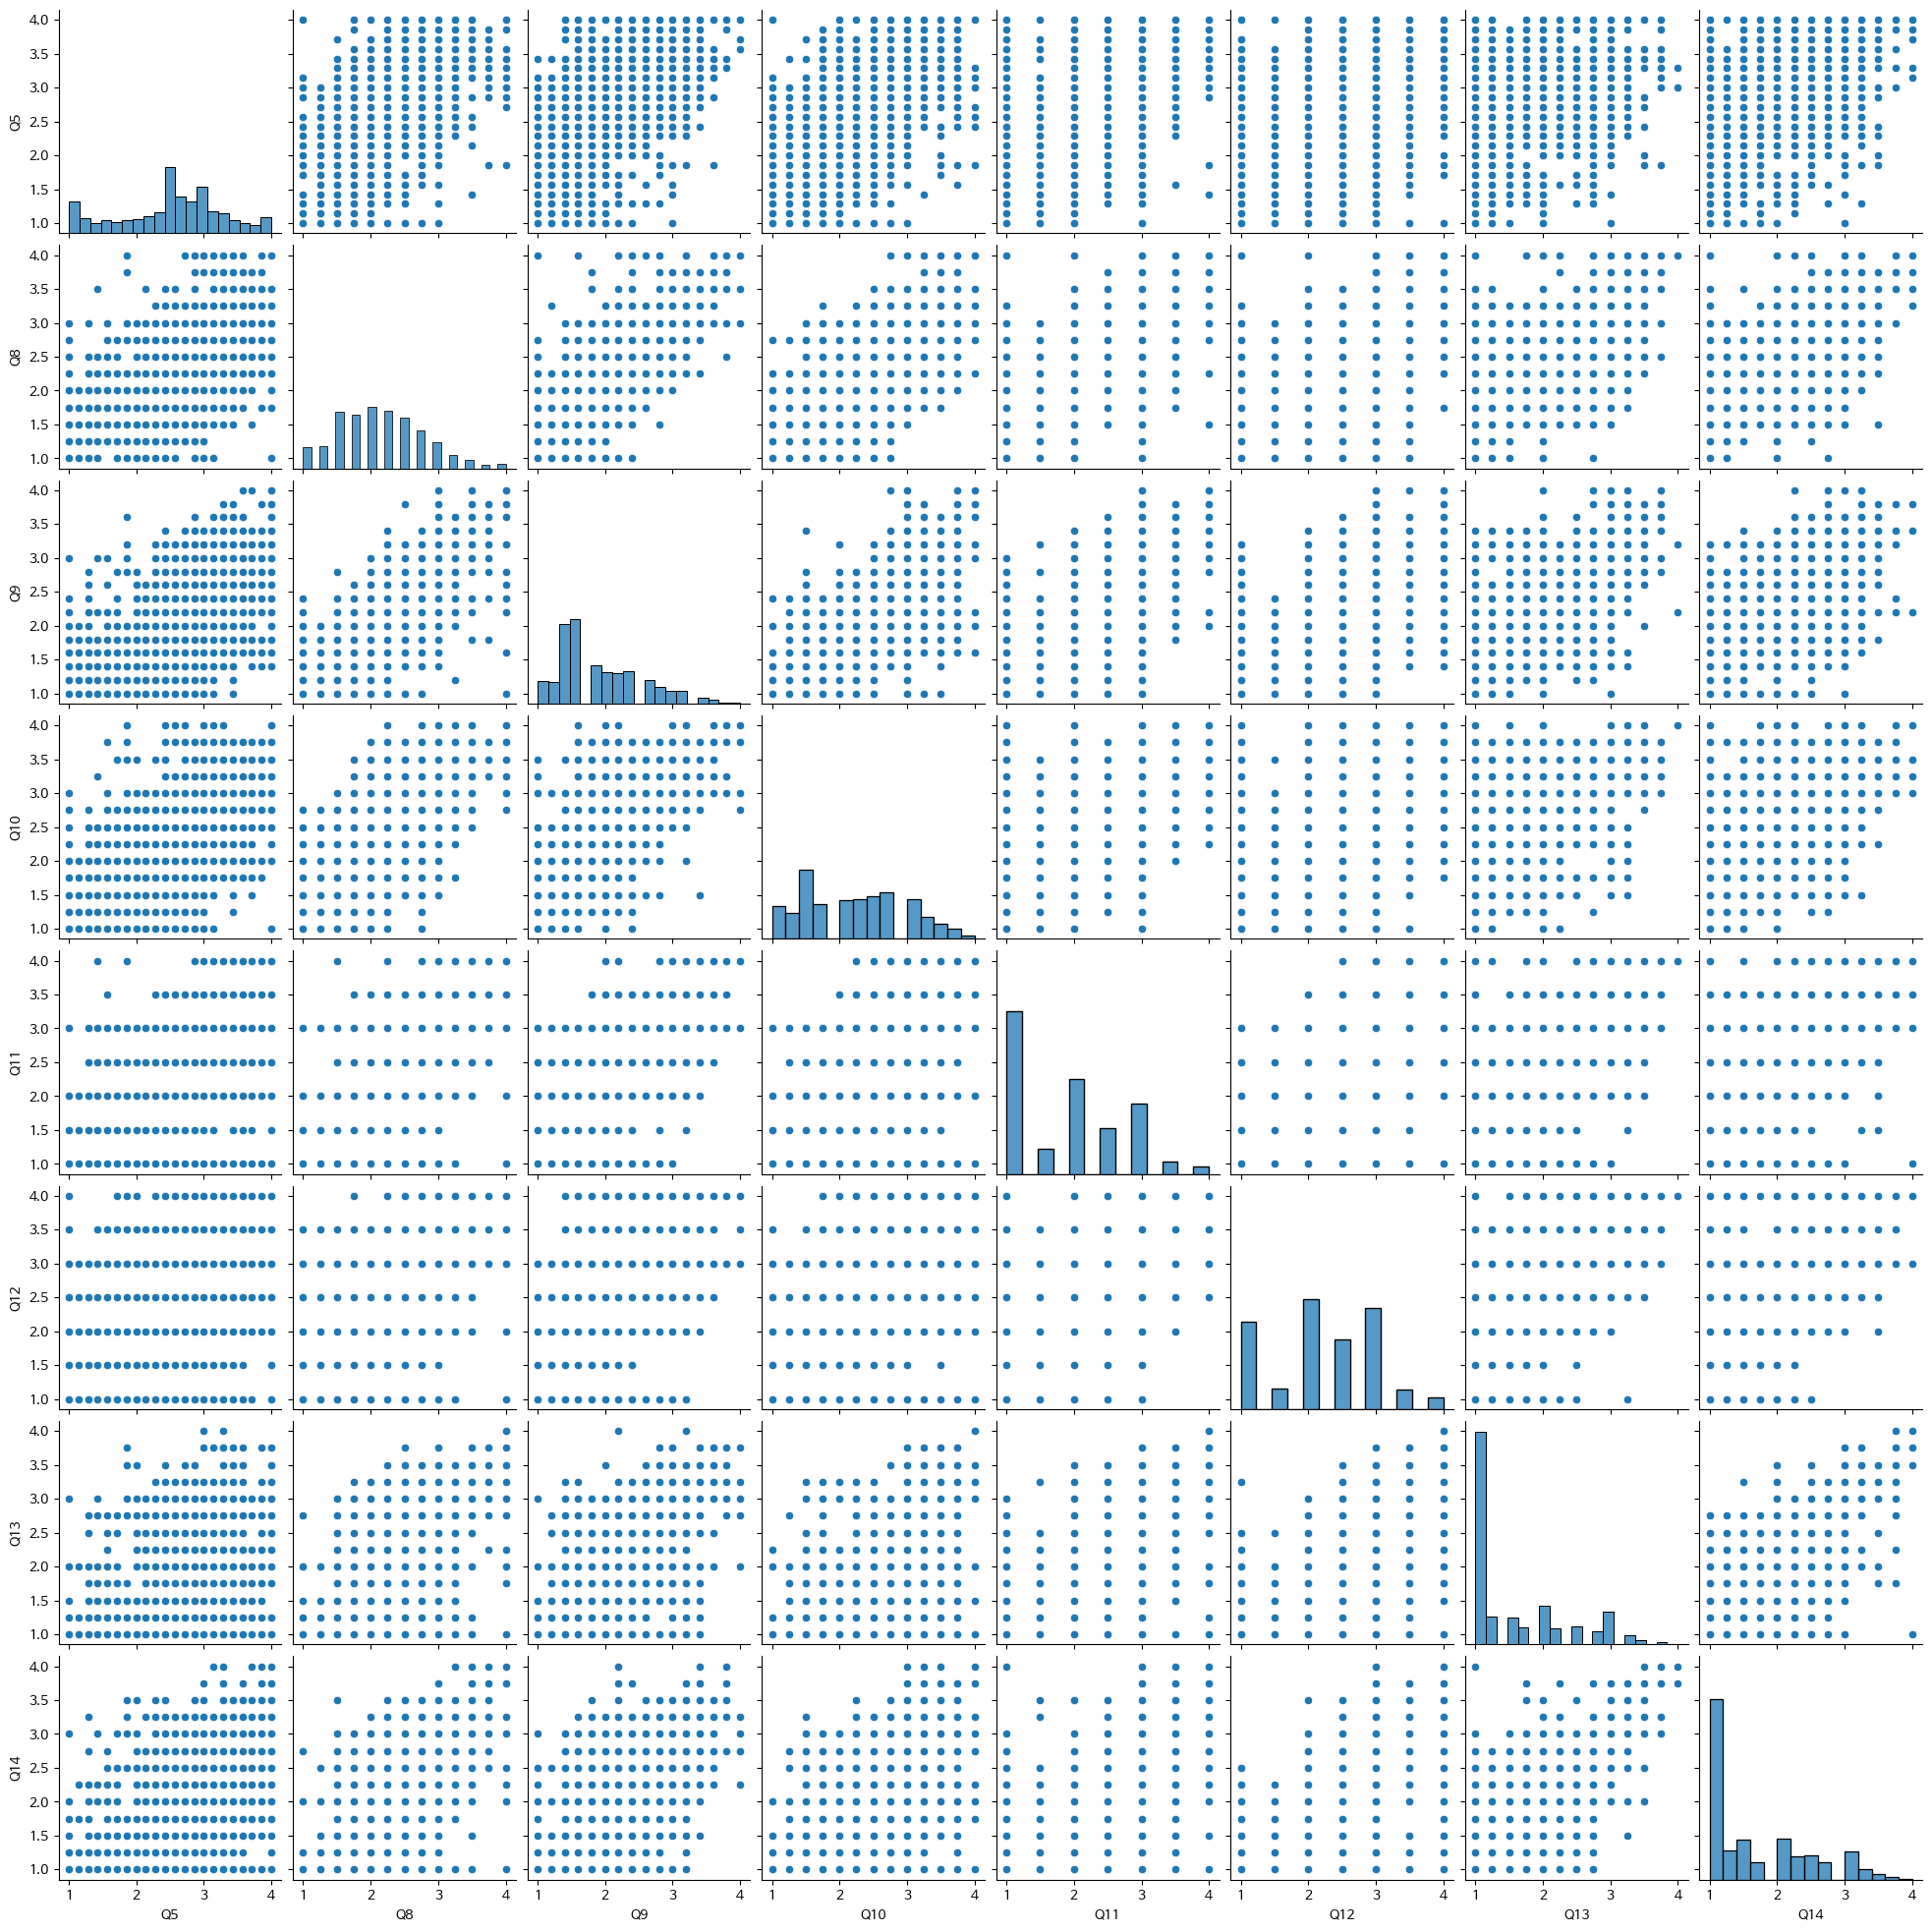

In [47]:
sns.pairplot(df_num)

In [60]:
print(pd.crosstab(data['age'], data['w'], margins=True) )
print(pd.crosstab(data['age'], data['w'], normalize='index') *100)  #행백분율 확인

w      100만원대  100만원미만  200만원대  300만원대  400-500만원대  600만원이상   All
age                                                              
50대        20        3      63     101         191      118   496
60대       147       35     206     215         162       84   849
70대이상     179       66     114      43          38       23   463
All       346      104     383     359         391      225  1808
w         100만원대    100만원미만     200만원대     300만원대  400-500만원대    600만원이상
age                                                                     
50대     4.032258   0.604839  12.701613  20.362903   38.508065  23.790323
60대    17.314488   4.122497  24.263840  25.323910   19.081272   9.893993
70대이상  38.660907  14.254860  24.622030   9.287257    8.207343   4.967603


Text(0.5, 1.0, 'ViolinePlot ')

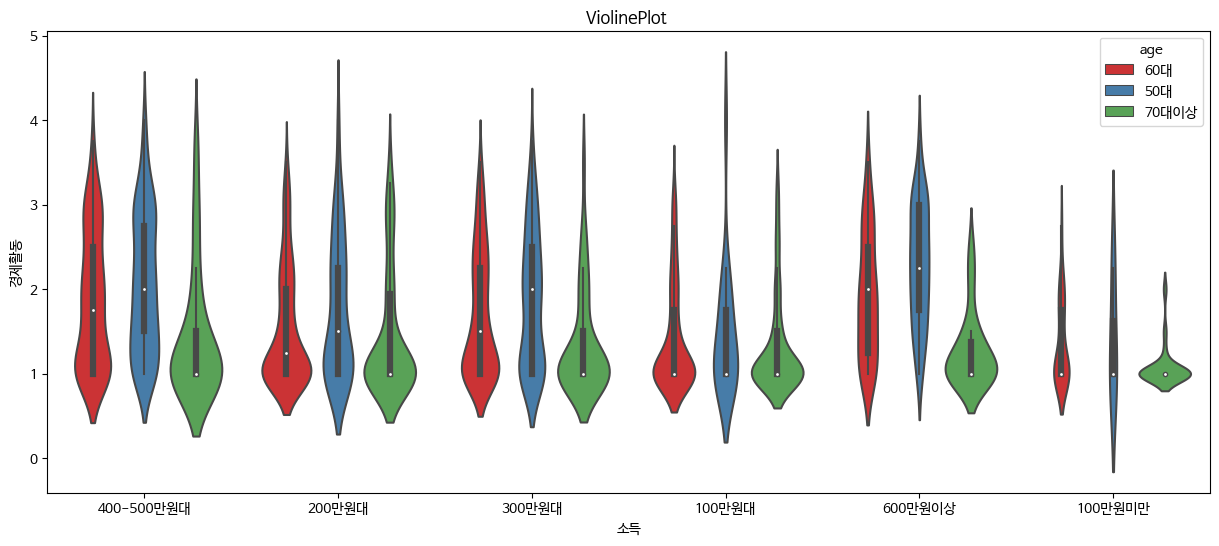

In [58]:
plt.figure(figsize=(15, 6))
sns.violinplot(x="w", y="Q14", hue="age", data=data, palette="Set1")
plt.xlabel("소득")
plt.ylabel("경제활동")
plt.title('ViolinePlot ')

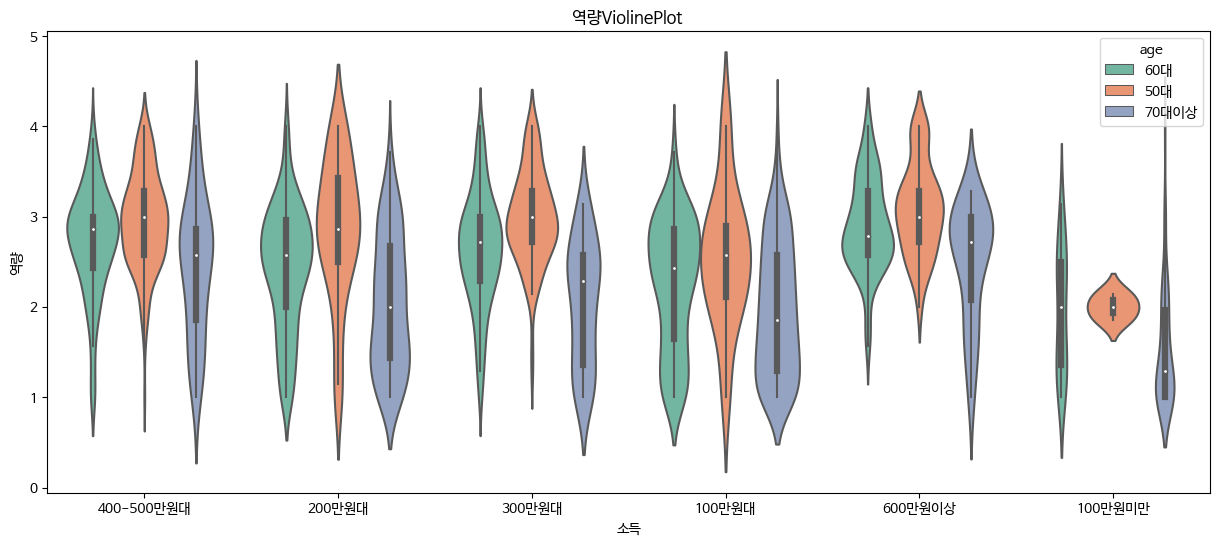

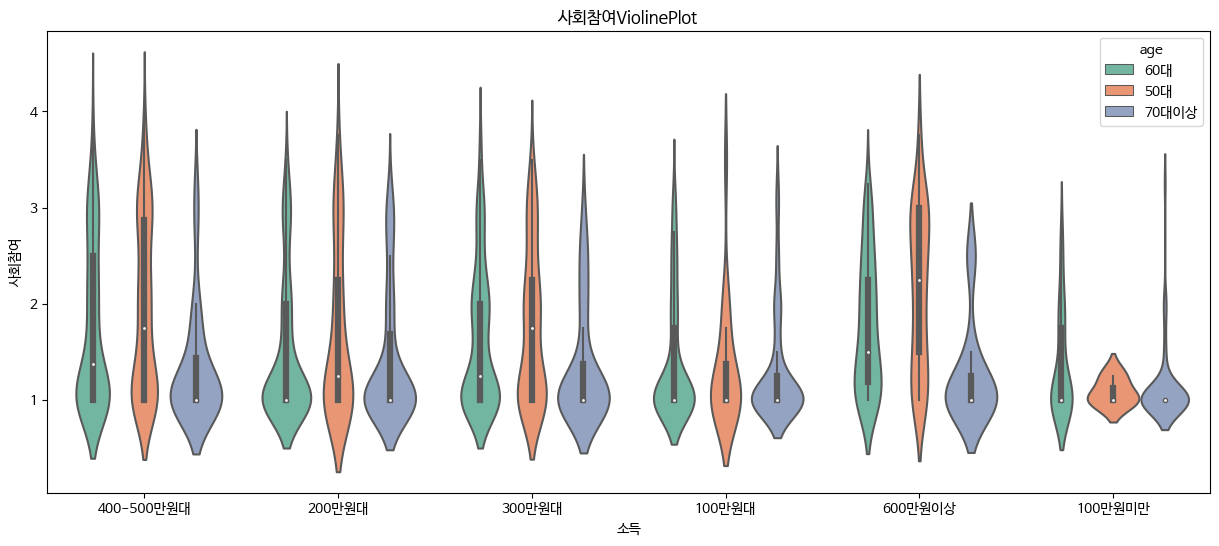

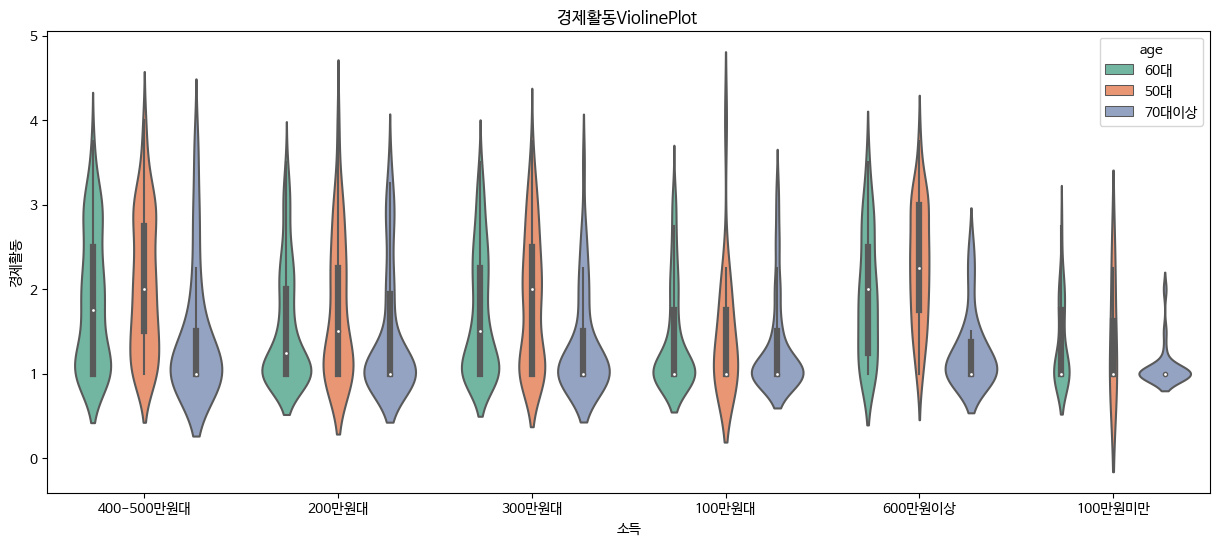

In [66]:

dic = {'역량': 'Q5', '사회참여': 'Q13', '경제활동': 'Q14'}
for key, val in dic.items() :
  plt.figure(figsize=(15, 6))
  sns.violinplot(x="w", y=val, hue="age", data=data, palette="Set2")
  plt.xlabel("소득")
  plt.ylabel(key)
  plt.title( key + 'ViolinePlot ')
  plt.show()